<a href="https://colab.research.google.com/github/SMC-AAU-CPH/SPIS/blob/main/01-Intro-librosa/librosa-101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBROSA 101
===

# Quickstart: Hellobeat

In [6]:
import librosa
import numpy as np

# Load a Librosa example
filename = librosa.example('nutcracker')

# Load the audio as a waveform `y`
# Store the sampling rate as `sr`
y, sr = librosa.load(filename)

#3. Run the default beat tracker, frames are centered
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))


Estimated tempo: 107.67 beats per minute


In [7]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)


# Advanced usage: Feature extraction


In [8]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# Seperate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)

# here comes the feature module
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]), beat_frames)




In [9]:
# Compute chroma features from the harmonic signal, sync by median, and vertically stack
beat_chroma = librosa.util.sync(librosa.feature.chroma_cqt(y=y_harmonic, sr=sr), beat_frames, aggregate=np.median)


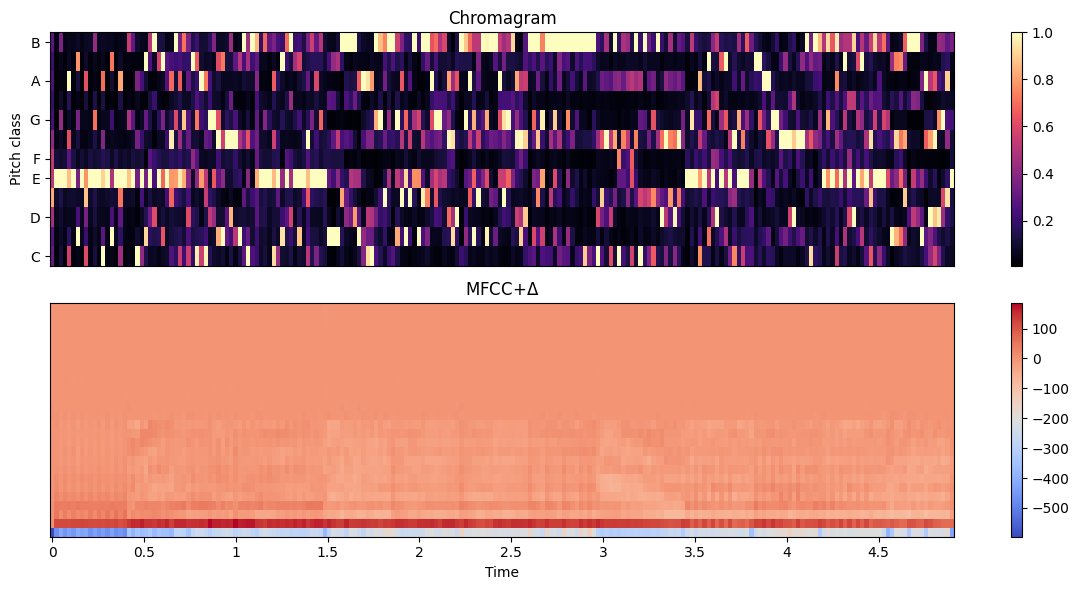

In [10]:
# Now visalize the beats in a short segment the best way you can
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 6))
# Let's draw a chromagram with beat-synchronous mean
plt.subplot(2,1,1)
librosa.display.specshow(beat_chroma, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.subplot(2,1,2)
librosa.display.specshow(beat_mfcc_delta, x_axis='time')
plt.colorbar()
plt.title('MFCC+$\Delta$')
plt.tight_layout()
plt.show()


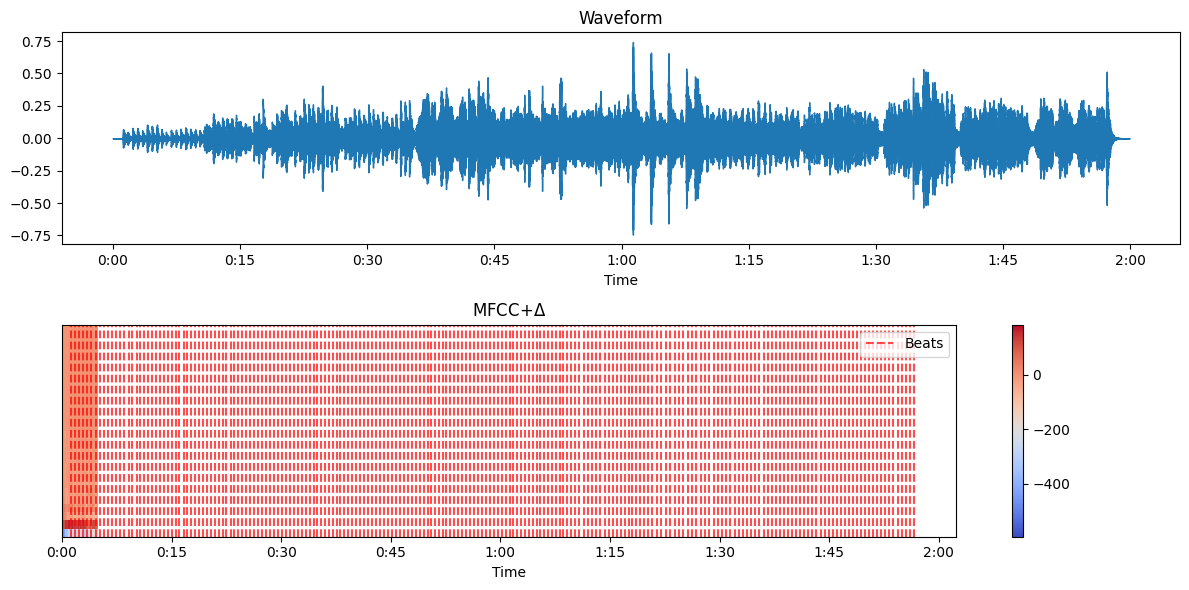

In [11]:
# Plot the waveform
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')

# Plot the beats on the MFCC subfigure
plt.subplot(2, 1, 2)
librosa.display.specshow(beat_mfcc_delta, x_axis='time')
plt.colorbar()
plt.title('MFCC+$\Delta$')

# Plot the beats
plt.vlines(librosa.frames_to_time(beat_frames, sr=sr), plt.ylim()[0], plt.ylim()[1], color='r', alpha=0.7, linestyle='--', label='Beats')

plt.legend()
plt.tight_layout()
plt.show()
